In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd

In [6]:
bikes = pd.read_csv("day.csv")

In [7]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [53]:
bikes.shape

(730, 16)

In [54]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [55]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bikes['season'] = bikes['season'].map({1: 'spring', 2: 'summer', 3:'fall',4:'winter'})

In [9]:
bikes['weekday'] = bikes['weekday'].map({0: 'Tuesday', 1: 'Wednesday', 2:'Thursday',3:'Friday', 4:'Saturday', 5:'Sunday', 6:'Monday'})

In [10]:
bikes['weathersit'] = bikes['weathersit'].map({1: 'Clear', 2: 'Misty', 3:'Light_Snow',4:'Heavy_Snow'})

In [11]:
bikes['mnth'] = bikes['mnth'].map({1: 'January', 2: 'February', 3:'March',4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})

In [12]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,Monday,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,Tuesday,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Need to convert the mnth, season, weathersit and weekday into categorical datatype

In [13]:
bikes['season']=bikes['season'].astype('category')
bikes['weathersit']=bikes['weathersit'].astype('category')
bikes['mnth']=bikes['mnth'].astype('category')
bikes['weekday']=bikes['weekday'].astype('category')

##### We can actually drop instant (key), dteday (just mentions the date), casual and registered  (since they are added to find continuous variable cnt. Also, temp and atemp are also highly correlated hence removing one of them.

In [14]:
bikes.drop(['instant', 'dteday','casual','registered','atemp'], axis = 1, inplace = True)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
bikes_numeric = ['cnt','hum','windspeed','temp']

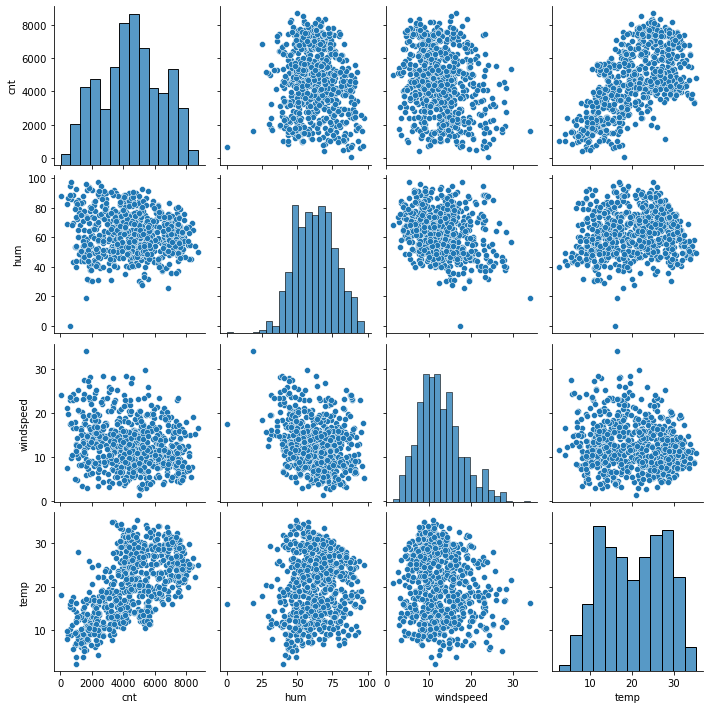

In [100]:
sns.pairplot(bikes[bikes_numeric])
plt.show()

##### temp, atemp and cnt are showing linear relationship. temp and atemp are perfectly linear which shows that they might show multicollinearity as well.

##### We will now check few categorical variables that we have to see some viible patterns and trends in the data

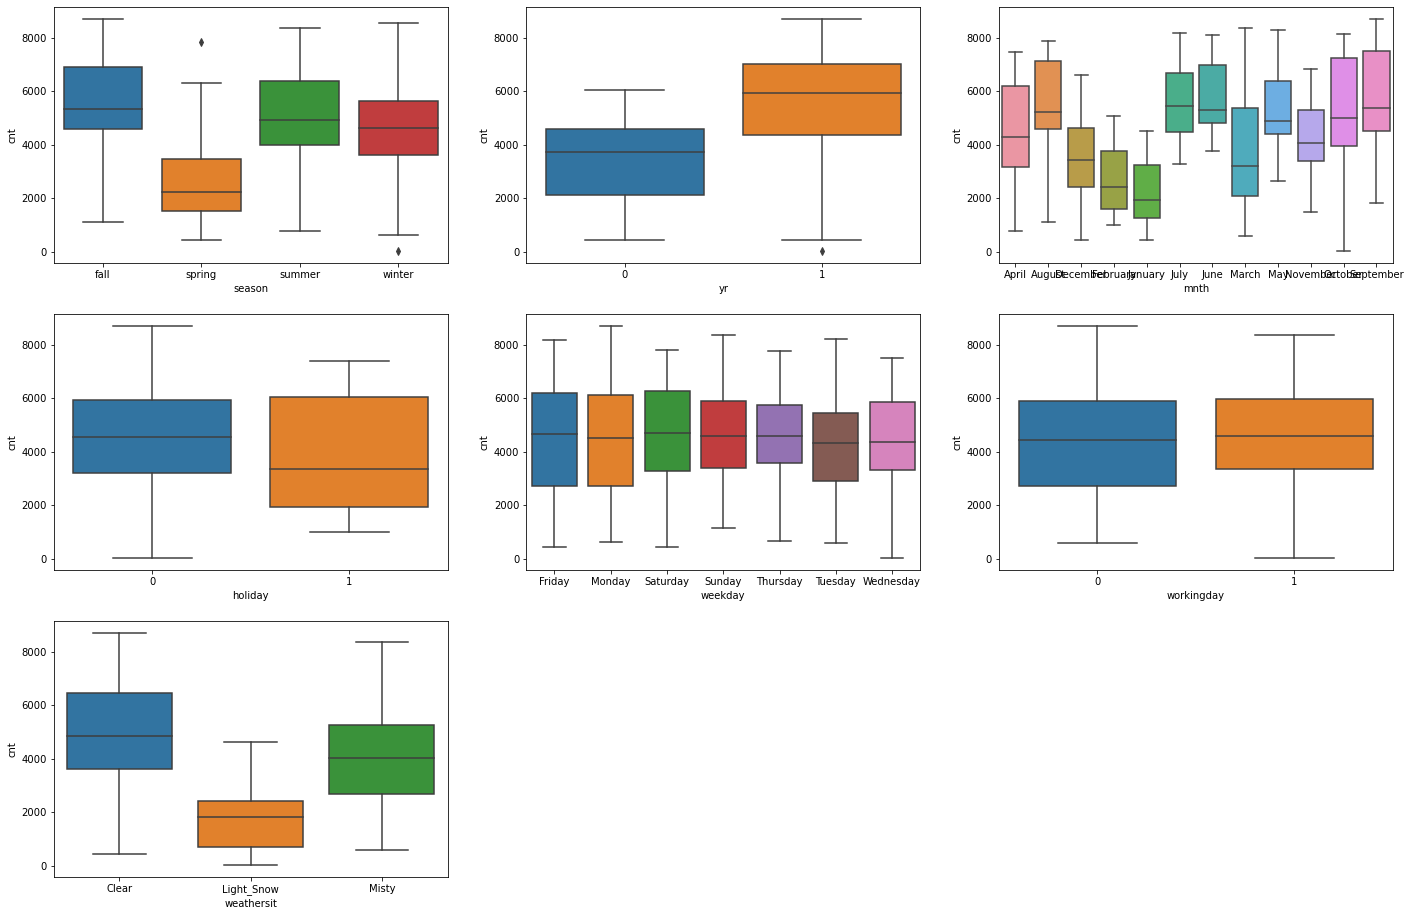

In [337]:
plt.figure(figsize=(24, 16))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

##### Inferences:
There are few inferences that can be made out based on the data. The median during summer and fall is much higher which means usage of bikes is higher during that time. Also, usage of bikes has increased from 2018 to 2019. The months show similar pattern as season since months between 4 to 9 show summer and fall. There is more usage when there is no holiday (=0). The usage remains same across weekday and workingdays. The usage is more when weathersit = 1 which means for Clear weather, which is as expected.

##### Dummy variables creation
We will create dummy variables for mnth, season, weathersit and weekday

In [16]:
bikes_modified = pd.get_dummies(bikes, drop_first = True)
bikes_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_spring          730 non-null    uint8  
 8   season_summer          730 non-null    uint8  
 9   season_winter          730 non-null    uint8  
 10  mnth_August            730 non-null    uint8  
 11  mnth_December          730 non-null    uint8  
 12  mnth_February          730 non-null    uint8  
 13  mnth_January           730 non-null    uint8  
 14  mnth_July              730 non-null    uint8  
 15  mnth_J

In [17]:
bikes_modified.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Split the data into Training and Test sets

In [18]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes_modified, train_size = 0.7, test_size = 0.3, random_state = 100)

In [278]:
df_train.shape

(510, 29)

##### Rescaling the features now

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [22]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Misty
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [23]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### All of them vary between 0 min and 1 max, so we have scaled it succesfully

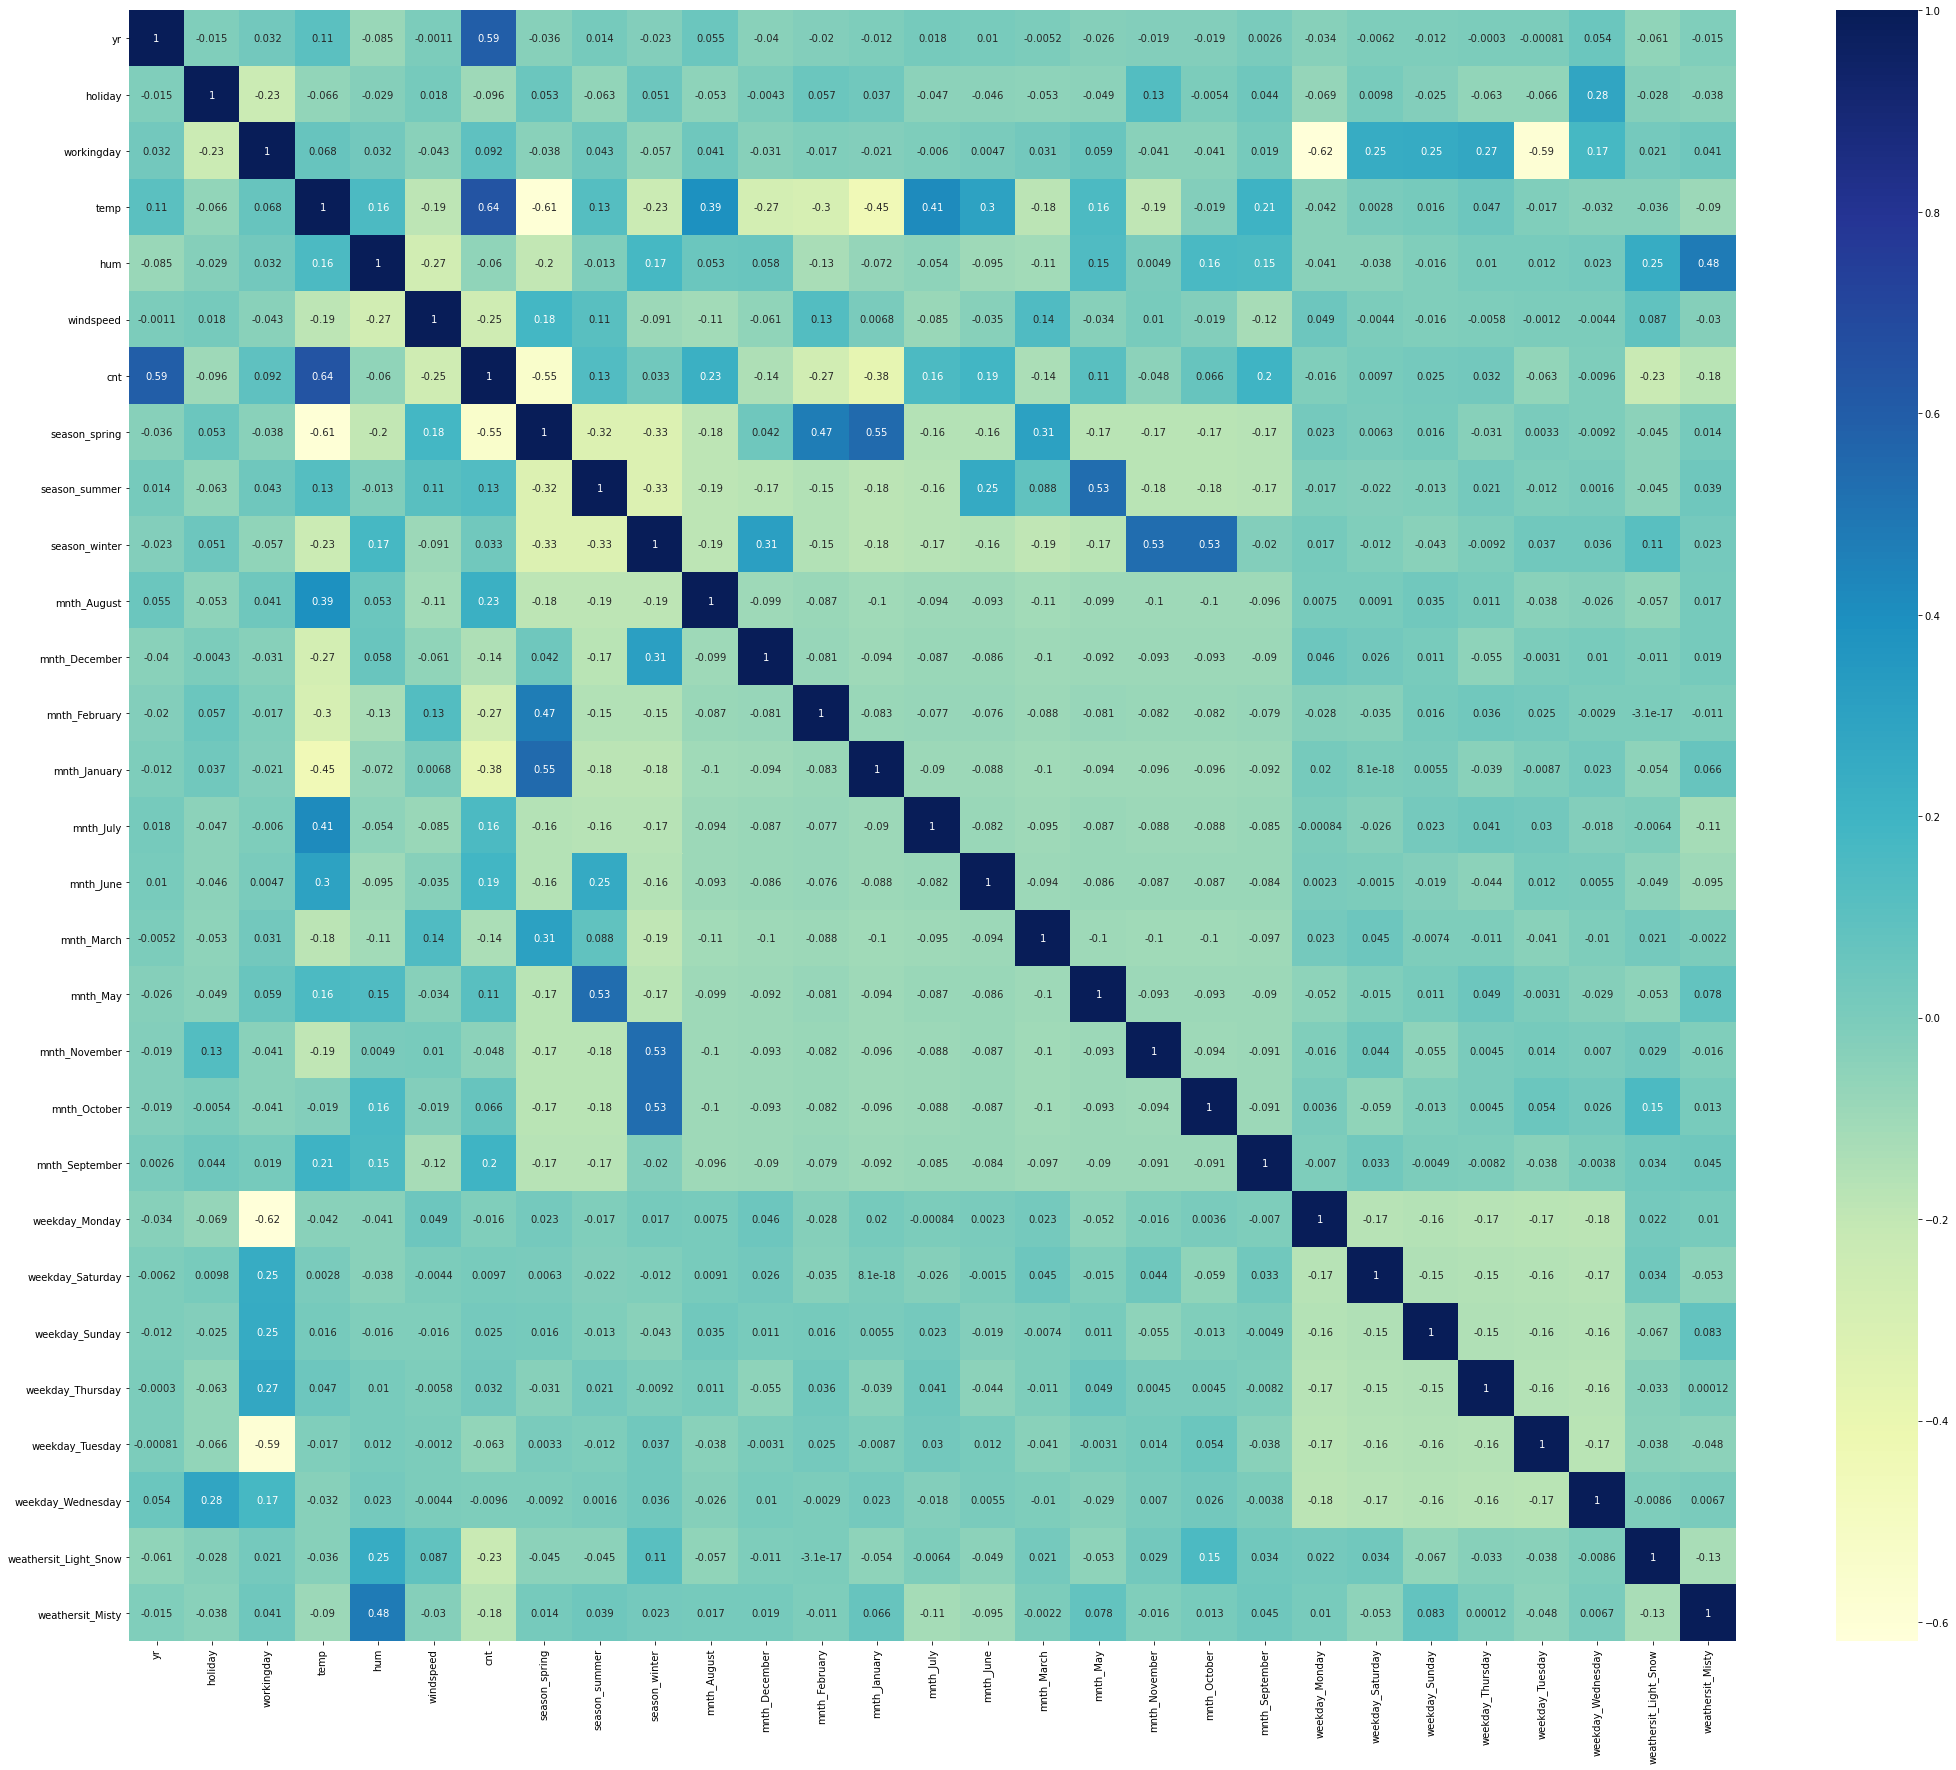

In [191]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (36, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### We will first go for RFE method for elimination since there are too many features currently, we will go for p value and VIF method of elmination after reducing the features

In [24]:
y_train = df_train.pop('cnt')
X_train = df_train

In [25]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [26]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 6),
 ('mnth_December', False, 3),
 ('mnth_February', False, 4),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 14),
 ('mnth_May', False, 5),
 ('mnth_November', False, 2),
 ('mnth_October', False, 10),
 ('mnth_September', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 12),
 ('weekday_Sunday', False, 11),
 ('weekday_Thursday', False, 9),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 8),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Misty', True, 1)]

In [28]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_January',
       'mnth_July', 'mnth_September', 'weekday_Monday',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [29]:
X_train_rfe_modifed = X_train[col]

In [30]:
X_train_rfe_modifed.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_January,mnth_July,mnth_September,weekday_Monday,weathersit_Light_Snow,weathersit_Misty
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1


##### Build a linear model using STATSMODEL

In [31]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe_modifed)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                    0.251042
yr                       0.230502
holiday                 -0.058529
workingday               0.043521
temp                     0.509836
hum                     -0.154716
windspeed               -0.185956
season_spring           -0.050806
season_summer            0.049660
season_winter            0.094426
mnth_January            -0.034326
mnth_July               -0.053193
mnth_September           0.081186
weekday_Monday           0.053721
weathersit_Light_Snow   -0.248777
weathersit_Misty        -0.057824
dtype: float64

In [32]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          2.31e-191
Time:                        09:32:19   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

##### VIF

In [33]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_modifed.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_modifed.values, i) for i in range(X_train_rfe_modifed.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_Misty,2.29
0,yr,2.09
12,weekday_Monday,1.98


##### The p value are below 5 and hence manageable here, there are a lot of fetaures with very high VIF and hence we will pick the one with highest VIF which is hum

In [35]:
X_train_modified = X_train_rfe_modifed.drop('hum', 1,)

In [36]:
# Build a second fitted model
X_train_lm = sm.add_constant(X_train_modified)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [37]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          7.33e-189
Time:                        09:32:46   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [38]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_modified.columns
vif['VIF'] = [variance_inflation_factor(X_train_modified.values, i) for i in range(X_train_modified.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,yr,2.08
7,season_winter,1.99
11,weekday_Monday,1.97
8,mnth_January,1.62
9,mnth_July,1.59


##### Based on the VIF values we can't remove temp since we know that temperature is a crucial factor for explaining the variation in cnt (based on the coefficient value of 0.4728 and EDA analysis). We will pick another feature 'season_spring which has highest p value among the top 5 fetaures with highest VIF

In [39]:
X_train_modified_latest = X_train_modified.drop('season_spring', 1,)

In [40]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_modified_latest)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [41]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          2.88e-188
Time:                        09:33:07   Log-Likelihood:                 506.98
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     496   BIC:                            -926.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_modified_latest.columns
vif['VIF'] = [variance_inflation_factor(X_train_modified_latest.values, i) for i in range(X_train_modified_latest.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.83
2,workingday,4.71
4,windspeed,3.67
0,yr,2.05
10,weekday_Monday,1.85
5,season_summer,1.82
6,season_winter,1.57
12,weathersit_Misty,1.56
8,mnth_July,1.53
7,mnth_January,1.31


##### mnth_July has the highest p value among all the features let's remove this as well

In [43]:
X_train_modified_latest = X_train_modified_latest.drop('mnth_July', 1,)

In [44]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X_train_modified_latest)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [45]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.4
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.64e-188
Time:                        09:33:36   Log-Likelihood:                 504.76
No. Observations:                 510   AIC:                            -983.5
Df Residuals:                     497   BIC:                            -928.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_modified_latest.columns
vif['VIF'] = [variance_inflation_factor(X_train_modified_latest.values, i) for i in range(X_train_modified_latest.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,5.23
2,workingday,4.68
4,windspeed,3.66
0,yr,2.05
9,weekday_Monday,1.84
5,season_summer,1.63
11,weathersit_Misty,1.55
6,season_winter,1.50
7,mnth_January,1.31
8,mnth_September,1.21


##### Let's remove holiday as well, whose p value is approaching 5

In [47]:
X_train_modified_latest = X_train_modified_latest.drop('holiday', 1,)

In [48]:
X_train_lm = sm.add_constant(X_train_modified_latest)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [49]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.2
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          8.02e-189
Time:                        09:33:56   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     498   BIC:                            -930.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_modified_latest.columns
vif['VIF'] = [variance_inflation_factor(X_train_modified_latest.values, i) for i in range(X_train_modified_latest.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.10
1,workingday,4.28
3,windspeed,3.57
0,yr,2.05
8,weekday_Monday,1.75
4,season_summer,1.63
10,weathersit_Misty,1.55
5,season_winter,1.47
6,mnth_January,1.29
7,mnth_September,1.20


##### This seems like a good model with p value almost equal to 0 for almost all fetaures and VIF <=5 for all features as well.

##### We will now perform residual analysis of the training data to check if the error terms are normally distributed (which is one of the major assumptions of linear regression model) 

In [51]:
y_train_cnt = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

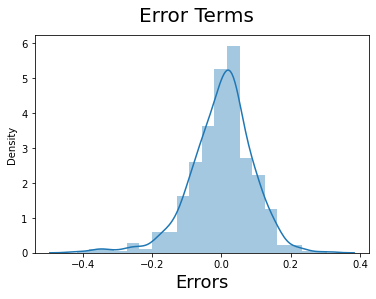

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### From the above relationship we can see that the residual errors are normally distributed, hence our assumption for linear regression for error terms holds true

##### We can also show that the error terms have somewhat constant variance (homoscedasticity)

Text(0, 0.5, 'Residual')

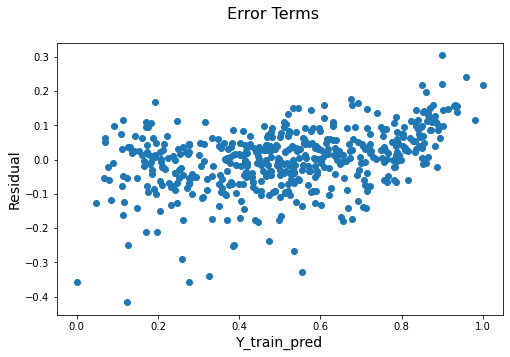

In [53]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,y_train - y_train_cnt)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14) 

##### Residual plot is reasonably random and error terms are showing somewhat homoscedasticity

##### Making predictions on test dataset using final model lr_5

In [54]:
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [55]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
y_test = df_test.pop('cnt')
X_test = df_test


In [57]:
X_test = X_test[col]

In [58]:
# Adding constant variable to test dataframe
X_test_m5 =sm.add_constant(X_test)

In [59]:
X_test_m5.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_January,mnth_July,mnth_September,weekday_Monday,weathersit_Light_Snow,weathersit_Misty
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,1,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,0


In [60]:
X_test_m5 = X_test_m5.drop(['hum','season_spring','mnth_July','holiday'], axis = 1)

In [61]:
# Making predictions using the fifth model

y_pred_m5 = lr_5.predict(X_test_m5)

##### Evaluate the Model

Text(0, 0.5, 'y_pred')

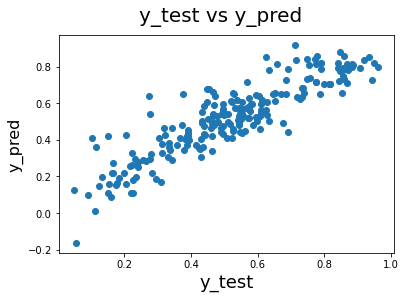

In [62]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

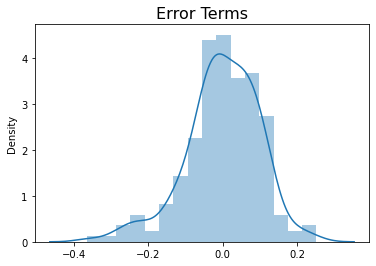

In [63]:
res_test = y_test - y_pred_m5
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

##### Above shows normal distribution with mean at 0

Text(0, 0.5, 'Residual')

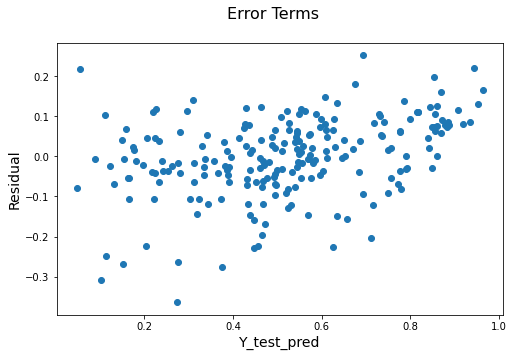

In [64]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_test_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)  

##### Residual plot is pretty random

##### Adjusted R2 value for test dataset

In [328]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m5)

0.7931096010968175

##### Adjusted r2 for test dataset

In [333]:
r2 = 0.7931096010968175
# n is number of rows in X

n = X_test_m5.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_m5.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7810577331995447

##### Adjusted r2 for train dataset

In [334]:
r2 = 0.838
# n is number of rows in X

n = X_train_modified_latest.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_train_modified_latest.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8344216867469879

##### Final Result:

1. R2 value of train dataset: 0.838
2. R2 value of test dataset = 0.793
3. Adjusted R2 of train dataset = 0.834
4. Adjusted R2 of test dataset = 0.781

Since the R2 values don't differ by more than 5pc we can conclude that the model that we have created will work well in case of any other similar generic bike datasets in future. Also looking at homoscedsticity property it is exhibiting and the fact that error terms are normally distributed with mean 0 proves that lm_5 is good model which can be used

##### Final Coefficients

In [336]:
lr_5.params

const                    0.102228
yr                       0.234049
workingday               0.056333
temp                     0.519743
windspeed               -0.163135
season_summer            0.080151
season_winter            0.120092
mnth_January            -0.046352
mnth_September           0.095030
weekday_Monday           0.067922
weathersit_Light_Snow   -0.289776
weathersit_Misty        -0.080389
dtype: float64

cnt = 0.102 + 0.234Xyr + 0.056Xworkingday + 0.519Xtemp - 0.163Xwindspeed + 0.08Xseason_summer + 0.12Xseason_winter - 0.046Xmnth_January + 0.095Xmnth_September + 0.067Xweekday_Monday - 0.289Xweathersit_Light_Snow - 0.08Xweathersit_Misty


These are the significant features which impact the final cnt value and their corresponding proportion in explaining its variation.